# Analise de mercado financeiro com Pyhton
### *Fincancial analic with python*
## Prática
Exercicio com base na Aula [Análise de AÇÕES DO MERCADO FINANCEIRO com Python (Projeto Prático](https://www.youtube.com/watch?v=28dG0gyXz80)

In [7]:
# libraries
!pip install yfinance
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
import yfinance as yf

### Acquiring the date:

In [8]:
#importando os dados das ações
ticket = yf.Ticker('^BVSP')
#df = ticket.history(perido='3y', interval = '1mo')

df = ticket.history(interval = '1d', start = '2018-01-01', end =  '2021-01-01')
df

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2018-01-02,76403.0,77909.0,76403.0,77891.0,2880300,0,0
2018-01-03,77889.0,78414.0,77602.0,77995.0,3142200,0,0
2018-01-04,77998.0,79135.0,77998.0,78647.0,3486100,0,0
2018-01-05,78644.0,79071.0,78218.0,79071.0,2747100,0,0
2018-01-08,79070.0,79395.0,78631.0,79379.0,2550800,0,0
...,...,...,...,...,...,...,...
2020-12-22,115825.0,116903.0,115648.0,116348.0,6947900,0,0
2020-12-23,116636.0,118311.0,116636.0,117857.0,6483300,0,0
2020-12-28,117806.0,119213.0,117805.0,119051.0,7171700,0,0


In [10]:
df.tail()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2020-12-22,115825.0,116903.0,115648.0,116348.0,6947900,0,0
2020-12-23,116636.0,118311.0,116636.0,117857.0,6483300,0,0
2020-12-28,117806.0,119213.0,117805.0,119051.0,7171700,0,0
2020-12-29,119130.0,119861.0,118750.0,119475.0,6769700,0,0
2020-12-30,119410.0,120150.0,118919.0,119306.0,8235700,0,0


### Changing it to a time series

- additive model 

    - y(t) = Trend_t + Seasonality_t + Noise_t
    
- Multiplication model

    - y(t) = Trend_t * Seasonality_t * Noise_t


In [13]:
df[['Close']].info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 739 entries, 2018-01-02 to 2020-12-30
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Close   739 non-null    float64
dtypes: float64(1)
memory usage: 11.5 KB


In [17]:
df[['Close']].head()

,Close
Date,
2018-01-02,77891.0
2018-01-03,77995.0
2018-01-04,78647.0
2018-01-05,79071.0
2018-01-08,79379.0


In [26]:
decomposicao = seasonal_decompose(df[['Close']], model = 'additive', period = 30, extrapolate_trend = 30)
#Period = janela de tempo/dados
#Extrapolate = evitar que os primeiros dados fiquem nulos;


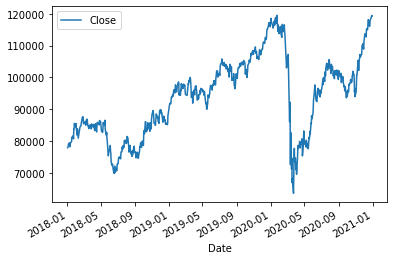

In [23]:
df[['Close']].plot()

In [28]:
decomposicao.seasonal + decomposicao.resid + decomposicao.trend

Date
2018-01-02     77891.0
2018-01-03     77995.0
2018-01-04     78647.0
2018-01-05     79071.0
2018-01-08     79379.0
                ...   
2020-12-22    116348.0
2020-12-23    117857.0
2020-12-28    119051.0
2020-12-29    119475.0
2020-12-30    119306.0
Length: 739, dtype: float64

In [31]:
decomposicao.trend.iloc[0:5]

Date
2018-01-02    80608.120699
2018-01-03    80729.378145
2018-01-04    80850.635591
2018-01-05    80971.893038
2018-01-08    81093.150484
Name: trend, dtype: float64

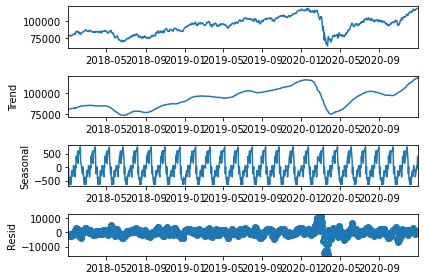

In [32]:
decomposicao.plot();

In [34]:
decomposicao_multi = seasonal_decompose(df[['Close']], model = 'multiplicative', period = 30, extrapolate_trend =30)
decomposicao_multi.seasonal


Date
2018-01-02    1.000411
2018-01-03    0.995063
2018-01-04    0.994163
2018-01-05    0.992405
2018-01-08    0.995267
                ...   
2020-12-22    0.999201
2020-12-23    0.996152
2020-12-28    1.001220
2020-12-29    1.000271
2020-12-30    1.005005
Name: seasonal, Length: 739, dtype: float64

In [36]:
min(decomposicao_multi.resid)

0.8085880725779133

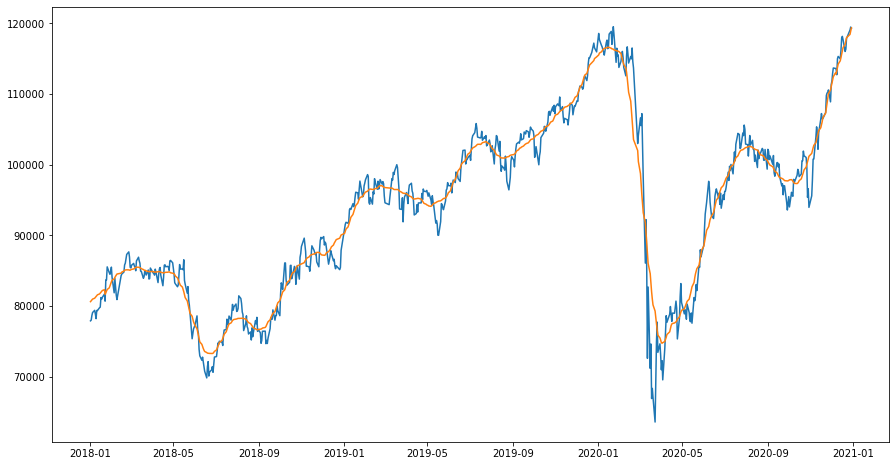

In [40]:
ax, fig = plt.subplots(figsize=(15, 8))
plt.plot(decomposicao.observed)
plt.plot(decomposicao.trend)
plt.show()

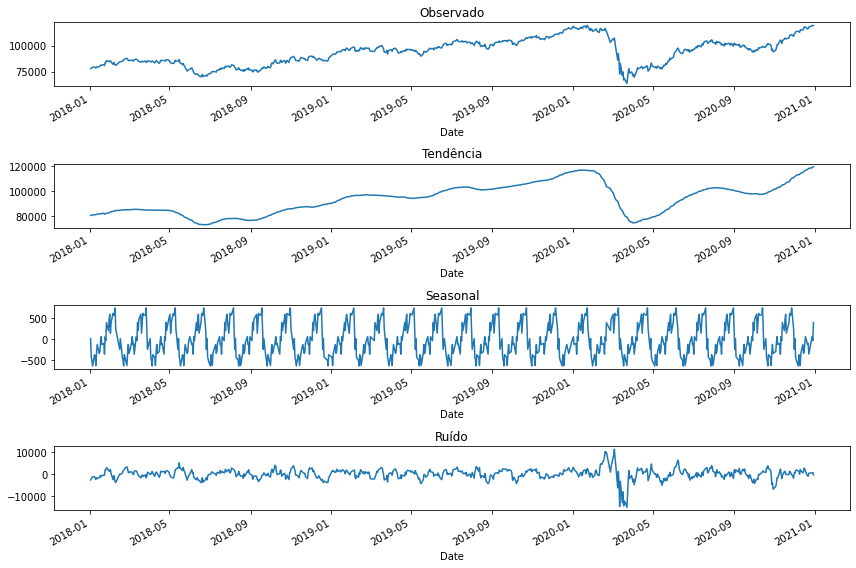

In [67]:
fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, figsize=(12, 8))
decomposicao.observed.plot(ax=ax1, title="Observado")
decomposicao.trend.plot(ax=ax2, title="Tendência")
decomposicao.seasonal.plot(ax=ax3, title="Seasonal")
decomposicao.resid.plot(ax=ax4, title="Ruído")
plt.tight_layout()

### Calcular a média movel

In [41]:
df['Close']

Date
2018-01-02     77891.0
2018-01-03     77995.0
2018-01-04     78647.0
2018-01-05     79071.0
2018-01-08     79379.0
                ...   
2020-12-22    116348.0
2020-12-23    117857.0
2020-12-28    119051.0
2020-12-29    119475.0
2020-12-30    119306.0
Name: Close, Length: 739, dtype: float64

In [42]:
df['Close'].rolling(7).mean()  #media de uma janela de internvalo de dados

Date
2018-01-02              NaN
2018-01-03              NaN
2018-01-04              NaN
2018-01-05              NaN
2018-01-08              NaN
                  ...      
2020-12-22    116752.571429
2020-12-23    117164.285714
2020-12-28    117579.285714
2020-12-29    117797.571429
2020-12-30    117961.714286
Name: Close, Length: 739, dtype: float64

In [43]:
media_movel7d = df['Close'].rolling(7).mean()
media_movel14d = df['Close'].rolling(14).mean()
media_movel21d = df['Close'].rolling(21).mean()

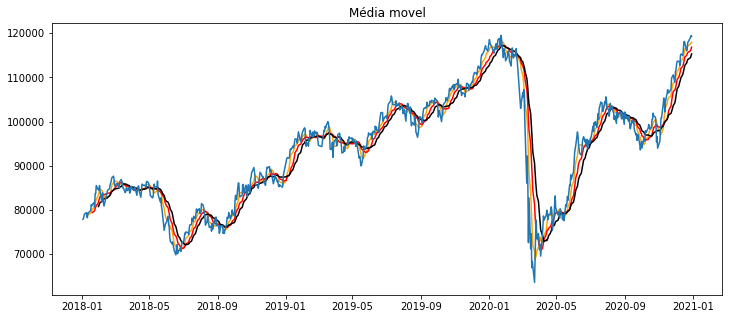

In [48]:
fig, ax = plt.subplots(figsize=(12, 5))
plt.plot(media_movel7d, 'orange')
plt.plot(media_movel14d, 'red')
plt.plot(media_movel21d, 'black')
plt.plot(df['Close'])
plt.title("Média movel")
plt.show()

### Feature extraction

In [86]:
df.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2018-01-02,76403.0,77909.0,76403.0,77891.0,2880300,0,0
2018-01-03,77889.0,78414.0,77602.0,77995.0,3142200,0,0
2018-01-04,77998.0,79135.0,77998.0,78647.0,3486100,0,0
2018-01-05,78644.0,79071.0,78218.0,79071.0,2747100,0,0
2018-01-08,79070.0,79395.0,78631.0,79379.0,2550800,0,0


In [90]:
df.reset_index(inplace= True)

In [93]:
df['Date'].dt.year

0      2018
1      2018
2      2018
3      2018
4      2018
       ... 
734    2020
735    2020
736    2020
737    2020
738    2020
Name: Date, Length: 739, dtype: int64

In [94]:
#Criar variaveis 
df['year'] = df['Date'].dt.year
df['month'] = df['Date'].dt.month
df['day'] = df['Date'].dt.day


In [95]:
df.head()

,level_0,index,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits,year,month,day
0,0,0,2018-01-02,76403.0,77909.0,76403.0,77891.0,2880300,0,0,2018,1,2
1,1,1,2018-01-03,77889.0,78414.0,77602.0,77995.0,3142200,0,0,2018,1,3
2,2,2,2018-01-04,77998.0,79135.0,77998.0,78647.0,3486100,0,0,2018,1,4
3,3,3,2018-01-05,78644.0,79071.0,78218.0,79071.0,2747100,0,0,2018,1,5
4,4,4,2018-01-08,79070.0,79395.0,78631.0,79379.0,2550800,0,0,2018,1,8


In [96]:
#rentabilidade é o preço atual / preço anterior * 100 - 100
df[['Close']]

,Close
0,77891.0
1,77995.0
2,78647.0
3,79071.0
4,79379.0
...,...
734,116348.0
735,117857.0
736,119051.0
737,119475.0


In [98]:
df['Close'].head()

0    77891.0
1    77995.0
2    78647.0
3    79071.0
4    79379.0
Name: Close, dtype: float64

In [99]:
df['Close'].shift()

0           NaN
1       77891.0
2       77995.0
3       78647.0
4       79071.0
         ...   
734    116016.0
735    116348.0
736    117857.0
737    119051.0
738    119475.0
Name: Close, Length: 739, dtype: float64

In [100]:
df['Rentabilidade'] =  df['Close'] / df['Close'].shift() * 100 - 100

In [101]:
df[['Rentabilidade']]

,Rentabilidade
0,NaN
1,0.133520
2,0.835951
3,0.539118
4,0.389523
...,...
734,0.286167
735,1.296971
736,1.013092
737,0.356150


In [115]:
#criando uma função para 
def features_extration(df_):
    df_['year'] =  df_['Date'].dt.year
    df_['month'] = df_['Date'].dt.month
    df_['day'] = df_['Date'].dt.day
    df_['Rentabilidade'] = df_['Close'] / df_['Close'].shift() * 100 - 100

In [119]:
features_extration(df)

### Hipotese 1 -  Existe um melhor mês pras investir?

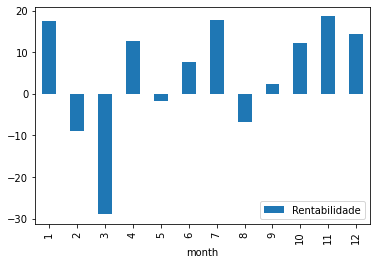

In [125]:
df.groupby('month').agg({'Rentabilidade': 'sum'}).plot(kind='bar')

### Correlação de séries temporais

In [128]:
tickets =  ['VALE3.SA', 'ITUB4.SA','PETR4.SA', 'ABEV3.SA', 'BBDC4.SA', 'BBAS3.SA', '^BVSP', 'USDBRL=X']

In [129]:
dfs = []
for t in tickets:
    print('Reading ticker {} ... '.format(t))
    ticket = yf.Ticker(t)
    aux = ticket.history(interval='1d', start='2018-01-01', end='2021-01-01')
    aux.reset_index(inplace=True)
    aux['ticket'] = t
    dfs.append(aux)

Reading ticker VALE3.SA ... 
Reading ticker ITUB4.SA ... 
Reading ticker PETR4.SA ... 
Reading ticker ABEV3.SA ... 
Reading ticker BBDC4.SA ... 
Reading ticker BBAS3.SA ... 
Reading ticker ^BVSP ... 
Reading ticker USDBRL=X ... 


In [130]:
dfs[0]

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits,ticket
0,2018-01-02,34.776320,35.894255,34.776320,35.877056,14156500,0.0,0,VALE3.SA
1,2018-01-03,35.971657,36.014654,35.515882,35.662075,12744200,0.0,0,VALE3.SA
2,2018-01-04,35.954455,36.436024,35.705069,35.808262,18433000,0.0,0,VALE3.SA
3,2018-01-05,35.748069,36.367233,35.524484,36.367233,15251300,0.0,0,VALE3.SA
4,2018-01-08,36.461827,37.175583,36.461827,37.175583,14542800,0.0,0,VALE3.SA
...,...,...,...,...,...,...,...,...,...
734,2020-12-22,83.115654,83.240048,81.747298,83.192207,23157000,0.0,0,VALE3.SA
735,2020-12-23,82.799879,83.756771,82.675485,83.594101,17710200,0.0,0,VALE3.SA
736,2020-12-28,84.005561,84.761506,83.326168,83.546249,26001300,0.0,0,VALE3.SA
737,2020-12-29,84.177801,84.397882,82.780740,83.316597,19727500,0.0,0,VALE3.SA


In [132]:
for d in dfs:
    features_extration(d)

In [134]:
correlacao = pd.DataFrame()
for d in dfs:
    correlacao[d['ticket'].iloc[0]] = d['Rentabilidade']

In [135]:
correlacao.head()

,VALE3.SA,ITUB4.SA,PETR4.SA,ABEV3.SA,BBDC4.SA,BBAS3.SA,^BVSP,USDBRL=X
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,-0.599216,0.683712,0.906364,0.230509,0.454705,1.275428,0.133520,0.102796
2,0.409922,2.082385,0.179648,-0.551957,1.640698,0.959535,0.835951,-1.606765
3,1.561012,0.288258,0.597707,0.370011,0.566457,0.000000,0.539118,-0.684511
4,2.222742,-0.331660,1.188369,-0.184328,-0.028178,0.237602,0.389523,-0.074182


In [136]:
correlacao.corr()

,VALE3.SA,ITUB4.SA,PETR4.SA,ABEV3.SA,BBDC4.SA,BBAS3.SA,^BVSP,USDBRL=X
VALE3.SA,1.000000,0.405102,0.521127,0.303406,-0.071688,-0.004622,0.659824,0.015217
ITUB4.SA,0.405102,1.000000,0.611530,0.526931,0.143872,0.213340,0.821110,-0.068694
PETR4.SA,0.521127,0.611530,1.000000,0.441122,0.069685,0.165699,0.815522,0.007941
ABEV3.SA,0.303406,0.526931,0.441122,1.000000,0.017143,0.022578,0.625953,-0.016548
BBDC4.SA,-0.071688,0.143872,0.069685,0.017143,1.000000,0.768887,0.056459,-0.024891
BBAS3.SA,-0.004622,0.213340,0.165699,0.022578,0.768887,1.000000,0.155822,-0.027448
^BVSP,0.659824,0.821110,0.815522,0.625953,0.056459,0.155822,1.000000,-0.008837
USDBRL=X,0.015217,-0.068694,0.007941,-0.016548,-0.024891,-0.027448,-0.008837,1.000000


## Visualização dos dados

In [137]:
import seaborn as sns
import plotly.graph_objs as go

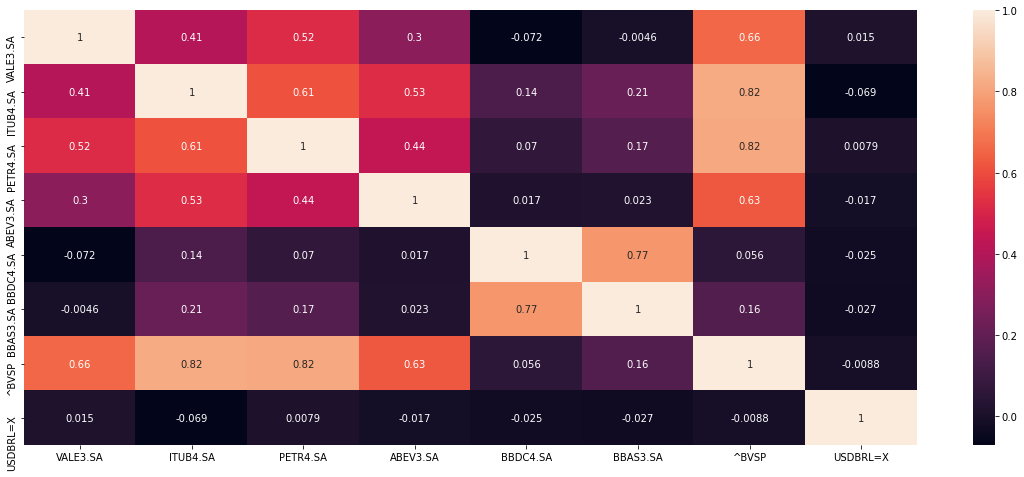

In [140]:
ax, fig = plt.subplots(figsize = (20,8))
ax = sns.heatmap(correlacao.corr(), annot = True)

In [147]:
def plot_lines(df, columns=['Open', 'Close', 'High', 'Low']):
    fig = go.Figure()
    for c in columns:
        fig.add_trace(go.Scatter(x=list(df.index),
                                 y=df[c],
                                 mode='markers+lines',
                                 name=c))
        return fig

In [149]:
plot_lines(df)

In [150]:
def plotCandleStick(df, acao='ticket'):
    tracel = {

        'x': df.index,
        'open': df.Open,
        'close': df.Close,
        'high': df.High,
        'low': df.Low,
        'type': 'candlestick',
        'name': acao,
        'showlegend': False
    }
    data = tracel
    layout = go.Layout()

    fig = go.Figure(data=data, layout=layout)
    return fig

In [152]:
plotCandleStick(df)

<span class="burk"> Ações da SM Ent  (041510.KQ) na KOSDAQ</span>

In [53]:
#Ações da SM Ent  (041510.KQ) na KOSDAQ
tickerSM =  yf.Ticker('041510.KQ')
dfSM = tickerSM.history(interval = '1d', start = '2017-01-01', end =  '2021-01-01')
dfSM.tail()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2018-01-25,38850.0,39100.0,37900.0,38200.0,291072,0,0
2018-01-26,38250.0,39450.0,38000.0,39450.0,235818,0,0
2018-01-29,40250.0,40300.0,39350.0,39600.0,343642,0,0
2018-01-30,39200.0,39300.0,38200.0,38400.0,236044,0,0
2018-01-31,37550.0,38950.0,37550.0,38600.0,225275,0,0


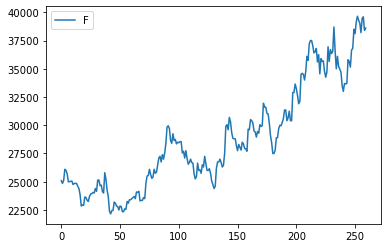

In [142]:
dfSM[['Close']].plot()
plt.legend('Fechamento')
plt.show()

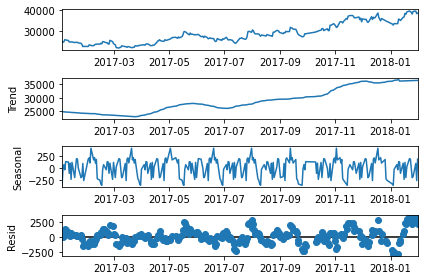

In [56]:
decSM = seasonal_decompose(dfSM[['Close']], model = 'additive', period = 30, extrapolate_trend = 30)
decSM.plot();

In [58]:
decSM_multi = seasonal_decompose(dfSM[['Close']], model = 'multiplicative', period = 30, extrapolate_trend =30)
decSM_multi.seasonal

Date
2017-01-02    0.991322
2017-01-03    1.002219
2017-01-04    1.006020
2017-01-05    1.001943
2017-01-06    1.006648
                ...   
2018-01-25    0.993942
2018-01-26    0.992786
2018-01-29    0.998081
2018-01-30    0.987742
2018-01-31    1.002052
Name: seasonal, Length: 260, dtype: float64

In [60]:
max(decSM_multi.resid)

1.1004485247875215

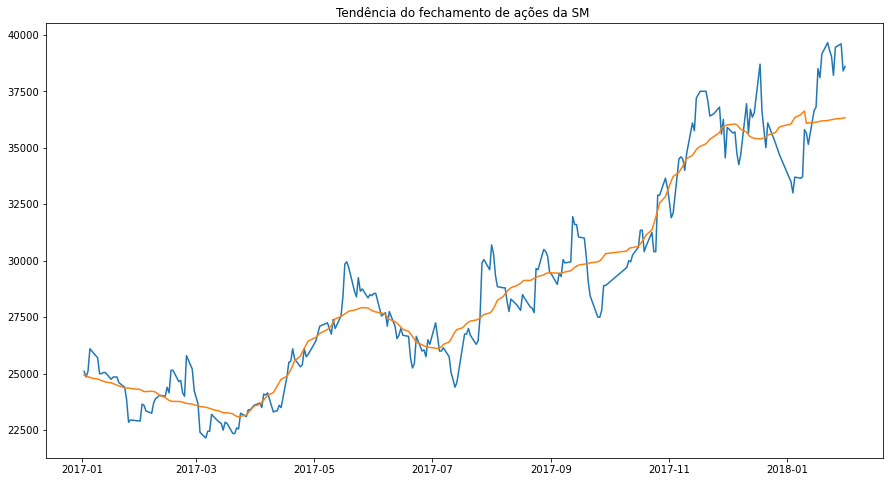

In [62]:
ax, fig = plt.subplots(figsize=(15, 8))
plt.plot(decSM.observed)
plt.plot(decSM.trend)
plt.title ("Tendência do fechamento de ações da SM Ent")
plt.show()

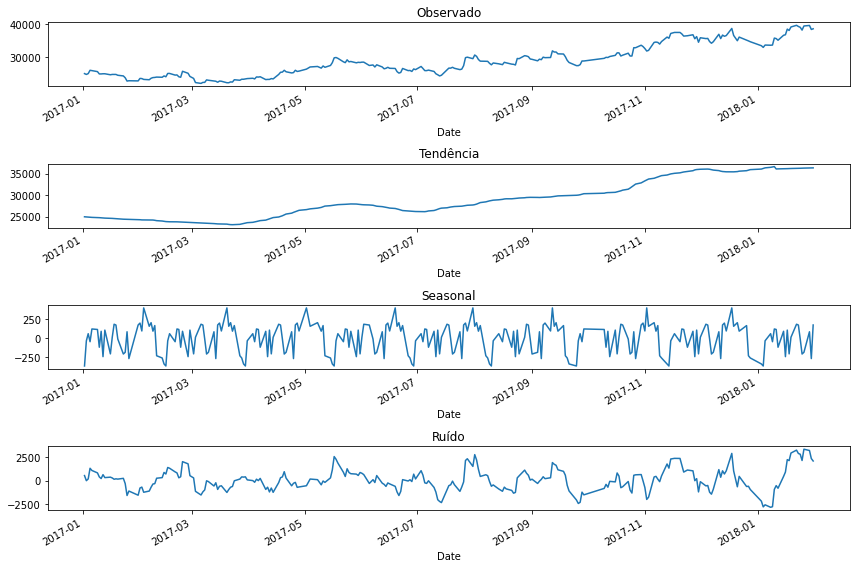

In [68]:
fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, figsize=(12, 8))
decSM.observed.plot(ax=ax1, title="Observado")
decSM.trend.plot(ax=ax2, title="Tendência")
decSM.seasonal.plot(ax=ax3, title="Seasonal")
decSM.resid.plot(ax=ax4, title="Ruído")
plt.tight_layout()

In [69]:
#media movel
dfSM['Close']

Date
2017-01-02    25100.0
2017-01-03    24850.0
2017-01-04    25100.0
2017-01-05    26100.0
2017-01-06    26000.0
               ...   
2018-01-25    38200.0
2018-01-26    39450.0
2018-01-29    39600.0
2018-01-30    38400.0
2018-01-31    38600.0
Name: Close, Length: 260, dtype: float64

In [70]:
dfSM['Close'].rolling(7).mean()

Date
2017-01-02             NaN
2017-01-03             NaN
2017-01-04             NaN
2017-01-05             NaN
2017-01-06             NaN
                  ...     
2018-01-25    38850.000000
2018-01-26    38985.714286
2018-01-29    39200.000000
2018-01-30    39092.857143
2018-01-31    38942.857143
Name: Close, Length: 260, dtype: float64

In [76]:
media_movel_SM7d = dfSM['Close'].rolling(7).mean()
media_movel_SM14d = dfSM['Close'].rolling(14).mean()
media_movel_SM21d = dfSM['Close'].rolling(21).mean()

In [122]:
dfSM.reset_index(inplace = True)
dfSM.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2017-01-02,25700.0,25750.0,24900.0,25100.0,153143,0,0
1,2017-01-03,25050.0,25250.0,24650.0,24850.0,156502,0,0
2,2017-01-04,24850.0,25100.0,24750.0,25100.0,152654,0,0
3,2017-01-05,25300.0,26500.0,25050.0,26100.0,401423,0,0
4,2017-01-06,26400.0,26500.0,25950.0,26000.0,202749,0,0


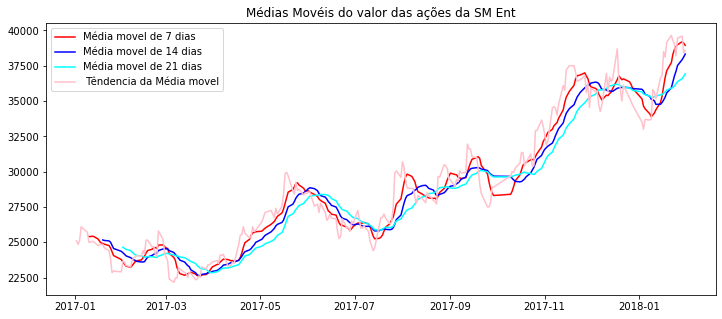

In [85]:
fig, ax = plt.subplots(figsize = (12,5))
plt.plot (media_movel_SM7d, 'red', label ='Média movel de 7 dias')
plt.plot (media_movel_SM14d, 'blue', label ='Média movel de 14 dias')
plt.plot (media_movel_SM21d, 'cyan', label ='Média movel de 21 dias')
plt.title( "Médias Movéis do valor das ações da SM Ent")
plt.plot(dfSM['Close'], 'Pink', label =' Têndencia da Média movel')
plt.legend()
plt.show()

In [123]:
features_extration(dfSM)

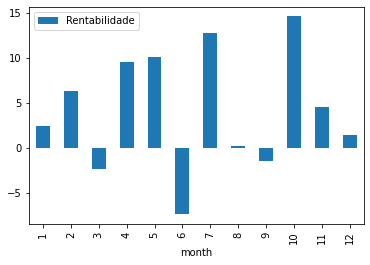

In [126]:
dfSM.groupby('month').agg({'Rentabilidade': 'sum'}).plot(kind='bar')

In [153]:
plotCandleStick(df)

### Qual impacto de algumas noticias sobre o SHINee em 2017 e 2018 nas ações da SM?